# **Homework:** 01-Introduction


In [1]:
#Loading utils libraries
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [3]:
jan_yellow_trips= pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")

In [4]:
jan_yellow_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
#  Q1. Total columns
f"Columns of Yellow trip dataset in January: {len(jan_yellow_trips.columns)}"

'Columns of Yellow trip dataset in January: 19'

In [6]:
# Compute duration ride column in minutes
jan_yellow_trips['duration'] = jan_yellow_trips.tpep_dropoff_datetime - jan_yellow_trips.tpep_pickup_datetime
jan_yellow_trips.duration = jan_yellow_trips.duration.apply(lambda td: td.total_seconds() / 60)

In [7]:
# Q2.standard deviation of the trips duration in January
f"std of duration time in Yellow taxis trips in January {jan_yellow_trips['duration'].std()}"

'std of duration time in Yellow taxis trips in January 42.59435124195458'

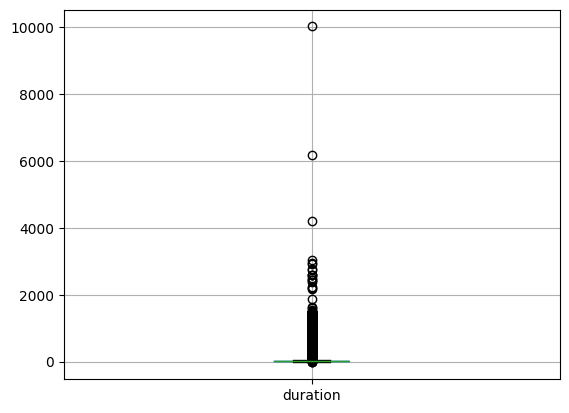

In [8]:
# Graph distribution for time of trips before remove outliers
total_trips_raw = len(jan_yellow_trips.index) 
ax = jan_yellow_trips.boxplot(column=['duration'])

In [9]:
# Graph distribution for time of trips after remove outliers
jan_yellow_trips = jan_yellow_trips[(jan_yellow_trips.duration >= 1) & (jan_yellow_trips.duration <= 60)]
total_trips_new = len(jan_yellow_trips.index)
ax = jan_yellow_trips.boxplot(column=['duration'])

In [10]:
# Q3. Dropping outliers
f"Percentage of records left after you dropped the outliers {total_trips_new/total_trips_raw*100}"

'Percentage of records left after you dropped the outliers 98.1220282212598'

In [11]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

jan_yellow_trips[categorical] = jan_yellow_trips[categorical].astype(str)

In [17]:
train_dicts = jan_yellow_trips[categorical].to_dict(orient='records')

In [18]:
# Q4. Len of train data
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

X_train # columns size

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [20]:
# Q5. Training a model
target = 'duration'
y_train = jan_yellow_trips[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

f"RMSE for linear regression {mean_squared_error(y_train, y_pred, squared=False)}"

/home/mateo/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


'RMSE for linear regression 7.649261934850555'

In [ ]:
# Loading february data for validation
feb_yellow_trips= pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

# Compute duration ride column in minutes
feb_yellow_trips['duration'] = feb_yellow_trips.tpep_dropoff_datetime - feb_yellow_trips.tpep_pickup_datetime
feb_yellow_trips.duration = feb_yellow_trips.duration.apply(lambda td: td.total_seconds() / 60)
feb_yellow_trips = feb_yellow_trips[(feb_yellow_trips.duration >= 1) & (feb_yellow_trips.duration <= 60)]

In [ ]:
categorical = ['PULocationID', 'DOLocationID']
feb_yellow_trips[categorical] = feb_yellow_trips[categorical].astype(str)
train_dicts_feb = feb_yellow_trips[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train_feb = dv.fit_transform(train_dicts_feb)
X_train_feb

In [28]:
target = 'duration'
y_test_feb = feb_yellow_trips[target].values

y_pred_feb = lr.predict(X_train_feb)
f"RMSE for test validation {mean_squared_error(y_test_feb, y_pred_feb, squared=False)}"

ValueError: X has 2 features, but LinearRegression is expecting 515 features as input.